# Monte Carlo simulation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import stock universe
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date',parse_dates = True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date',parse_dates = True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date',parse_dates = True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date',parse_dates = True)

In [4]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis = 1)
stocks.columns = ['appl','cisco','ibm','amzn']
stocks.head()

,appl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [5]:
stocks.tail()

,appl,cisco,ibm,amzn
Date,,,,
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13
2016-12-29,115.755990,29.662760,163.682078,765.15
2016-12-30,114.853583,29.429042,163.082762,749.87


In [5]:
stocks.pct_change(1).mean()

appl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [6]:
stocks.pct_change(1).corr()

,appl,cisco,ibm,amzn
appl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [7]:
log_ret = np.log(stocks/stocks.shift(1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b3f6160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e1d2470>]], dtype=object)

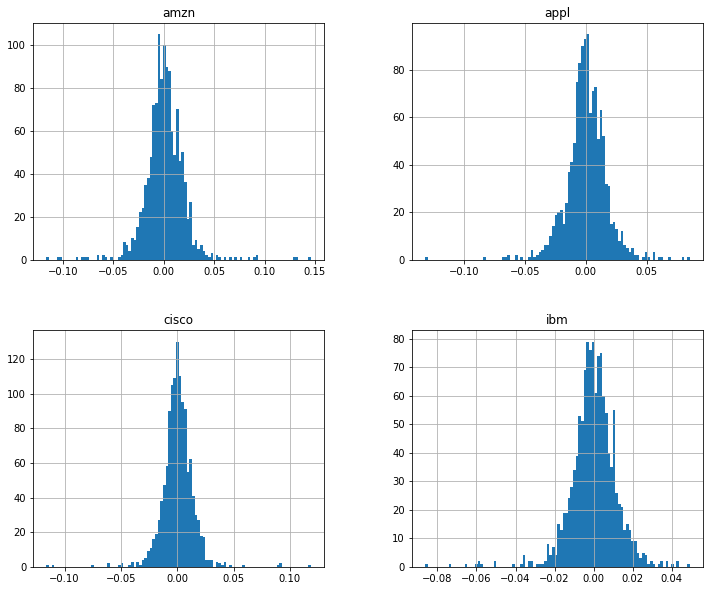

In [8]:
log_ret.hist(bins = 100, figsize = (12,10))

In [9]:
print(stocks.columns)
np.random.seed(101)
print('')

print('Random weights')
weights = np.array(np.random.random(4))
print(weights)

print('')

print('Rebalance weights')
weights = weights/np.sum(weights)
print(weights)
print('')

print('Expected return')
exp_return = np.sum((log_ret.mean()*weights)*252)
print(exp_return)
print('')

print('Expected volatitlity')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)
print('')

print('Sharpe ratio')
SR = exp_return/exp_vol
print(SR)

Index(['appl', 'cisco', 'ibm', 'amzn'], dtype='object')

Random weights
[ 0.51639863  0.57066759  0.02847423  0.17152166]

Rebalance weights
[ 0.40122278  0.44338777  0.02212343  0.13326603]

Expected return
0.15599272049632004

Expected volatitlity
0.185026495659

Sharpe ratio
0.843083148393


In [10]:
np.random.seed(101)

num_ports = 10000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    #Random weights
    weights = np.array(np.random.random(4))

    #Rebalance weights
    weights = weights/np.sum(weights)
    
    #Save weights
    all_weights[ind,:] = weights
    
    #Expected return
    ret_arr[ind] = exp_return = np.sum((log_ret.mean()*weights)*252)

    #Expected volatitlity
    vol_arr[ind] = exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #Sharpe ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [11]:
sharpe_arr.max()

1.0303260551271067

In [12]:
sharpe_arr.argmax()
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

In [13]:
all_weights[1420,:]

array([ 0.26188068,  0.20759516,  0.00110226,  0.5294219 ])

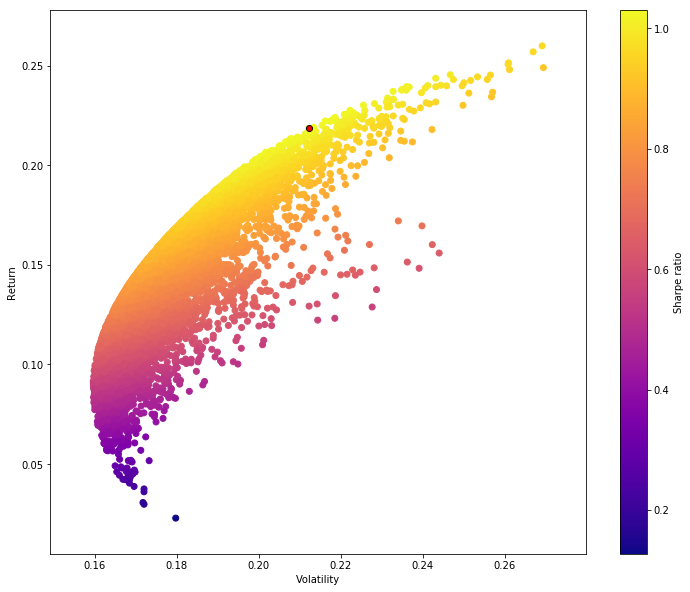

In [14]:
plt.figure(figsize = (12,10))
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black')

In [38]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean()*weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [39]:
from scipy.optimize import minimize

In [40]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1

In [41]:
def check_sum(weights):
    return np.sum(weights) - 1

In [42]:
cons = ({'type':'eq','fun': check_sum})

In [43]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [44]:
init_guess = [.25,.25,.25,.25]

In [45]:
opt_results = minimize(neg_sharpe,init_guess, method = 'SLSQP',bounds = bounds, constraints=cons)

In [46]:
opt_results

     fun: -1.0307168703360359
     jac: array([  5.64157963e-05,   4.18275595e-05,   3.39921713e-01,
        -4.44948673e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  2.66289767e-01,   2.04189819e-01,   6.93482815e-17,
         5.29520414e-01])

In [47]:
opt_results.x

array([  2.66289767e-01,   2.04189819e-01,   6.93482815e-17,
         5.29520414e-01])

In [48]:
get_ret_vol_sr(opt_results.x)

array([ 0.21885916,  0.21233683,  1.03071687])

In [49]:
frontier_y = np.linspace(0,0.3,100)

In [50]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [51]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

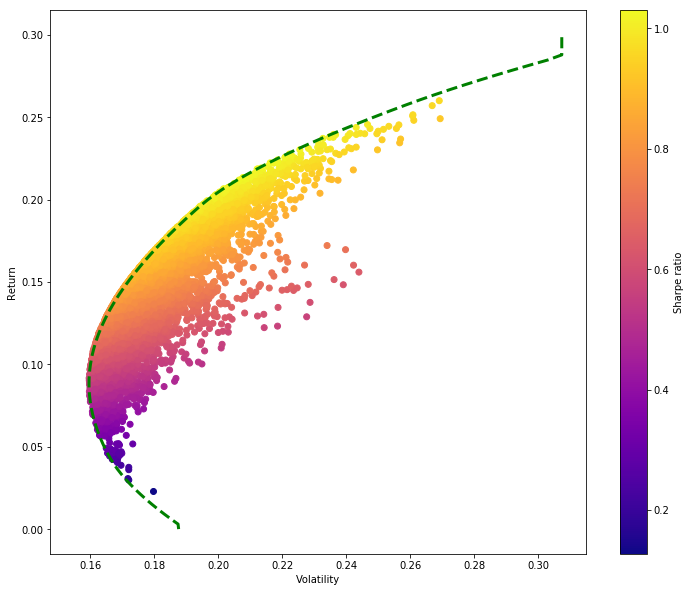

In [52]:
plt.figure(figsize = (12,10))
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)